# Step 1: Import all the necessary libraries

In [16]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
import random
from sklearn.preprocessing import StandardScaler

# Step 2: Fetch the dataset from UCI Library

In [17]:
# fetch dataset 
dry_bean = fetch_ucirepo(id=602) 
  
# data (as pandas dataframes) 
X = dry_bean.data.features 
y = dry_bean.data.targets

# Step 3: Preprocess the dataset as per requirements

In [18]:
df = pd.concat([X, y], axis=1)
df.columns = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4', 'Class']

In [19]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [21]:
df['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

In [22]:
# label encoding the target variable
le = LabelEncoder()
df['Class'] = le.fit_transform(y)

c:\Users\omen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,5
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,5
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,5


# Step 4: Create 10 samples of the dataset

In [24]:
# create 10 random samples of df
samples = []
for i in range(10):
    samples.append(df.sample(n=2000))

# Step 5: Find the best parameters for SVM

In [35]:
dataframes = []
result = pd.DataFrame(columns = ['Sample Number', 'Best Kernel', 'Best C', 'Best Gamma', 'Best Accuracy'])
for num,sample in enumerate(samples, start=1):
    df = pd.DataFrame(columns = ['iteration', 'kernel', 'C', 'gamma', 'accuracy'])
    X = sample.drop(['Class'], axis=1)
    y = sample['Class']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    kernelList = ['linear', 'poly', 'rbf', 'sigmoid']
    best_accuracy = 0
    for i in range(100):
        k = random.random()
        n = random.random()
        kernel = random.choice(kernelList)
        clf = svm.SVC(kernel=kernel, verbose=False, C=k, gamma=n, max_iter=1000)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy = np.mean(y_pred == y_test)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_kernel = kernel
            best_C = k
            best_gamma = n
            df = df.append({'iteration': i, 'kernel': kernel, 'C': k, 'gamma': n, 'accuracy': accuracy}, ignore_index=True)
    dataframes.append(df)
    result = result.append({'Sample Number': "sample {}".format(num), 'Best Kernel': best_kernel, 'Best C': best_C, 'Best Gamma': best_gamma, 'Best Accuracy': best_accuracy}, ignore_index=True)

c:\Users\omen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\omen\AppData\Local\Temp\ipykernel_6800\1018671748.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'iteration': i, 'kernel': kernel, 'C': k, 'gamma': n, 'accuracy': accuracy}, ignore_index=True)
c:\Users\omen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\omen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your da

In [36]:
result

,Sample Number,Best Kernel,Best C,Best Gamma,Best Accuracy
0,sample 1,linear,0.202901,0.614932,0.570000
1,sample 2,poly,0.028862,0.041215,0.590000
2,sample 3,poly,0.544742,0.083746,0.521667
3,sample 4,linear,0.050511,0.258514,0.761667
4,sample 5,linear,0.031749,0.487783,0.728333
5,sample 6,poly,0.833747,0.802457,0.600000
6,sample 7,linear,0.899719,0.859734,0.610000
7,sample 8,poly,0.517188,0.481643,0.678333
8,sample 9,poly,0.459517,0.174395,0.635000
9,sample 10,poly,0.912594,0.729040,0.638333


# Step 6: Analyze the result

*Extract the row which has the best value of accuracy*

In [37]:
# return the index  of the row of the dataframe with the highest accuracy
max_index = result[result['Best Accuracy'] == result['Best Accuracy'].max()].index[0]
print(max_index)

3


In [38]:
dataframes[max_index].head()

,iteration,kernel,C,gamma,accuracy
0,0,sigmoid,0.276059,0.441891,0.263333
1,1,poly,0.574561,0.545450,0.416667
2,4,linear,0.759281,0.664085,0.600000
3,5,poly,0.249681,0.254505,0.601667
4,6,linear,0.855259,0.834419,0.631667


*Plot the graph of Iteration vs Accuracy*

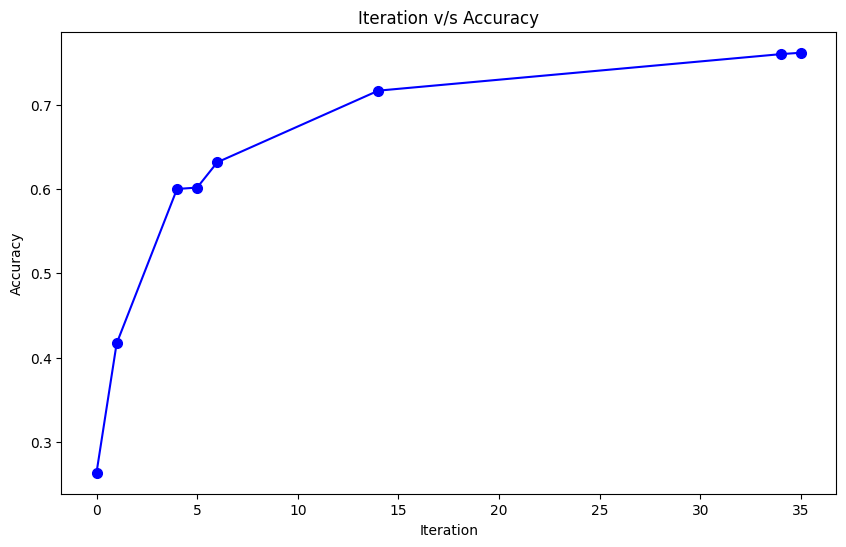

In [39]:
# plot the graph of iteration vs accuracy
plt.figure(figsize=(10,6))
plt.plot(dataframes[max_index]['iteration'],dataframes[max_index]['accuracy'], color='blue', marker='o', markerfacecolor='blue', markersize=7)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Iteration v/s Accuracy')
plt.show()

#### Note: The results may vary as the code works on random choices